# ONLINE RETAIL STORE

    
PROBLEM STATEMENT:

An online retail store is trying to understand the various customer purchase patterns for their firm, you are required to give enough evidence based insights to provide the same

DATASET OVERVIEW:

1.Online retail is a transactional data collection comprising all transactions for a UK-based and registered online retail non-store between 01/12/2010 and 09/12/2011. The business primarily offers distinctive all-occasion gifts. Many of the firm's clients are wholesalers.

2.The size of this dataset is about 541909 rows and 8 columns (invoice number, Stock code, Description, Quantity, Invoice date, Unit price, Customer ID)

3.We had performed Unsupervised learning algorithms on this dataset like K-Means and Hierarchical clustering

FEATURE INFORMATION:


InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

# READING & UNDERSTANDING DATA

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
import datetime as dt

In [2]:
retail=pd.read_csv(r"C:\Users\HP\Desktop\MIT X PGP\DATA sets\Caapstone DataSet\OnlineRetail (3).csv",encoding='ISO-8859-1')
retail.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [3]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
retail.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

# DATA MANIPULATION

In [6]:
#Data Cleaning and Manipulation
retail['Cancelled'] = retail['InvoiceNo'].str.find('C', start = 0)#if its true = 0 then false = -1
retail['Description'] = retail['Description'].fillna('None')
retail['Description'] = retail['Description'].str.strip()
retail['CustomerID'] = retail['CustomerID'].fillna('0')

In [7]:
retail['CustomerID'].unique()

array([17850.0, 13047.0, 12583.0, ..., 13298.0, 14569.0, 12713.0],
      dtype=object)

In [8]:
#Changing datatype of customer id column
retail['CustomerID'] = retail['CustomerID'].astype(str)

In [9]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
retail['Year'] = pd.to_datetime(retail['InvoiceDate']).dt.strftime('%Y')
retail['Month'] = pd.to_datetime(retail['InvoiceDate']).dt.strftime('%m')
retail['CustomerID'] = retail['CustomerID'].astype(float)
retail['Total_Sales'] = retail['Quantity']*retail['UnitPrice']
retail['hour'] = retail['InvoiceDate'].dt.hour

Overall, these steps involve converting the 'InvoiceDate' column to datetime format, extracting year and month information, converting 'CustomerID' to float, calculating total sales, and extracting the hour from the 'InvoiceDate' column.

# DATA VISUALIZATION

1 Bar plot: Top 5 countries with the most sales.
    
2.Bar plot: Distribution of transactions by month.
    
3.Bar plot: Top 5 countries with the most customers.
    
4.Bar plot: Sales per year.
    
5.Bar plot: Top 5 items with the highest sales.
    
6.Bar plot: Transaction status (successful vs. cancelled).

Text(0.5, 1.0, 'Top 5 Countries with most sales ')

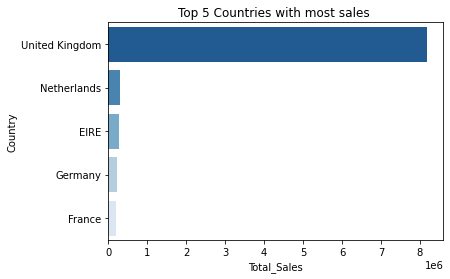

In [10]:
total_sales_per_country = retail.groupby('Country')['Total_Sales'].sum().reset_index().sort_values('Total_Sales',ascending=False)
sns.barplot(data=total_sales_per_country.head(5), x='Total_Sales',y='Country',palette = 'Blues_r')
plt.title("Top 5 Countries with most sales ")

In [11]:
customer_country=retail[['Country','CustomerID']].drop_duplicates()
customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

Country  CustomerID
36        United Kingdom        3951
14               Germany          95
13                France          88
31                 Spain          31
3                Belgium          25
33           Switzerland          22
27              Portugal          20
19                 Italy          15
12               Finland          12
1                Austria          11
25                Norway          10
24           Netherlands           9
0              Australia           9
9                Denmark           9
6        Channel Islands           9
7                 Cyprus           8
32                Sweden           8
20                 Japan           8
26                Poland           6
37           Unspecified           5
18                Israel           5
10                  EIRE           4
34                   USA           4
15                Greece           4
5                 Canada           4
2                Bahrain           3
23                 Malta           2
35  United Arab Emirates           2
30             Singapore           1
4                 Brazil           1
29          Saudi Arabia           1
21               Lebanon           1
28                   RSA           1
16             Hong Kong           1
17               Iceland           1
8         Czech Republic           1
22             Lithuania           1
11    European Community           1

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Month')

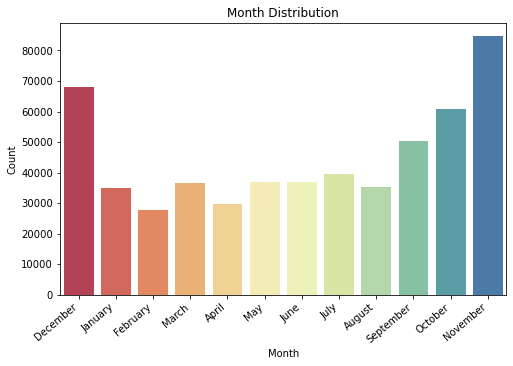

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(retail['InvoiceDate'].dt.month_name(),palette= 'Spectral')
plt.xticks(rotation=40,ha='right')
plt.title("Month Distribution")
plt.ylabel('Count')
plt.xlabel('Month')

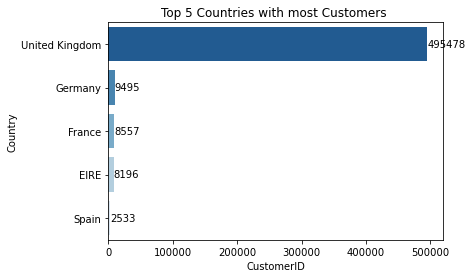

In [13]:
total_customer_per_country = retail.groupby('Country')['CustomerID'].count().reset_index().sort_values('CustomerID',ascending=False)

z=sns.barplot(data=total_customer_per_country.head(5), x='CustomerID',y='Country',palette = 'Blues_r')

plt.title("Top 5 Countries with most Customers ")

for i in z.containers:
    z.bar_label(i,)

Text(0.5, 1.0, 'Sales per Year ')

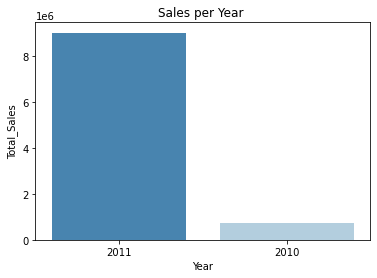

In [14]:
total_sales_per_year = retail.groupby('Year')['Total_Sales'].sum().reset_index().sort_values('Total_Sales',ascending=False)
sns.barplot(data=total_sales_per_year, x='Year',y='Total_Sales',palette = 'Blues_r')
plt.title("Sales per Year ")

In the year 2011 there were high sales than the 2010.

Text(0.5, 1.0, 'Sales per Month')

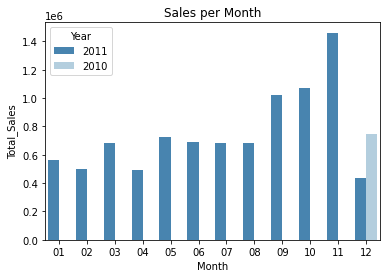

In [15]:
total_sales_per_month = retail.groupby(['Month','Year'])['Total_Sales'].sum().reset_index()
sns.barplot(data=total_sales_per_month, y='Total_Sales',x='Month',hue='Year',palette = 'Blues_r')
plt.title("Sales per Month")

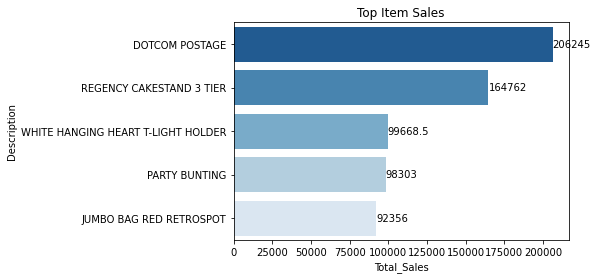

In [16]:
total_sales_per_category = retail.groupby('Description')['Total_Sales'].sum().reset_index().sort_values('Total_Sales',ascending=False)
z = sns.barplot(data=total_sales_per_category.head(5), y='Description',x='Total_Sales',palette = 'Blues_r')
plt.title("Top Item Sales")
for i in z.containers:
    z.bar_label(i,)

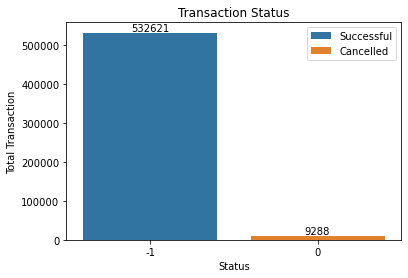

In [18]:
#total_cancelled = retail.groupby(['Cancelled']).count().reset_index()

z = sns.countplot(x=retail['Cancelled'], hue = retail['Cancelled'], dodge=False )
plt.ylabel("Total Transaction")
plt.xlabel("Status")
plt.title("Transaction Status")
labels = ["Successful","Cancelled"]
z.legend(labels)
for i in z.containers:
    z.bar_label(i,)

# DATA PREPARATION


    
We are going to analysis the Customers based on below 3 factors:
    
R (Recency): Number of days since last purchase
    
F (Frequency): Number of tracsactions
    
M (Monetary): Total amount of transactions (revenue contributed)

In [19]:
# New Attribute : Monetary

retail['Amount'] = retail['Quantity']*retail['UnitPrice']
rfm_m = retail.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

CustomerID      Amount
0         0.0  1447682.12
1     12346.0        0.00
2     12347.0     4310.00
3     12348.0     1797.24
4     12349.0     1757.55

In [20]:
# New Attribute : Frequency

rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

CustomerID  Frequency
0         0.0     135080
1     12346.0          2
2     12347.0        182
3     12348.0         31
4     12349.0         73

In [21]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

CustomerID      Amount  Frequency
0         0.0  1447682.12     135080
1     12346.0        0.00          2
2     12347.0     4310.00        182
3     12348.0     1797.24         31
4     12349.0     1757.55         73

In [22]:
# New Attribute : Recency

# Convert to datetime to proper datatype

retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [23]:
# Compute the maximum date to know the last transaction date

max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [24]:
# Compute the difference between max date and transaction date

retail['Diff'] = max_date - retail['InvoiceDate']
retail.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Cancelled  Year  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom         -1  2010   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         -1  2010   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom         -1  2010   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         -1  2010   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         -1  2010   

  Month  Total_Sales  hour  Amount              Diff  
0    12        15.30     8   15.30 373 days 04:24:00  
1    12        20.34     8   20.34 373 days 04:24:00  
2    12        22.00     8   22.00 373 days 04:24:00  
3    12        20.34     8   20.34 373 days 04:24:00  
4    12        20.34     8   20.34 373 days 04:24:00

In [25]:
# Compute last transaction date to get the recency of customers

rfm_p = retail.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

CustomerID              Diff
0         0.0   0 days 02:24:00
1     12346.0 325 days 02:33:00
2     12347.0   1 days 20:58:00
3     12348.0  74 days 23:37:00
4     12349.0  18 days 02:59:00

In [26]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

CustomerID  Diff
0         0.0     0
1     12346.0   325
2     12347.0     1
3     12348.0    74
4     12349.0    18

In [27]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

CustomerID      Amount  Frequency  Recency
0         0.0  1447682.12     135080        0
1     12346.0        0.00          2      325
2     12347.0     4310.00        182        1
3     12348.0     1797.24         31       74
4     12349.0     1757.55         73       18

Text(0.5, 0, 'Attributes')

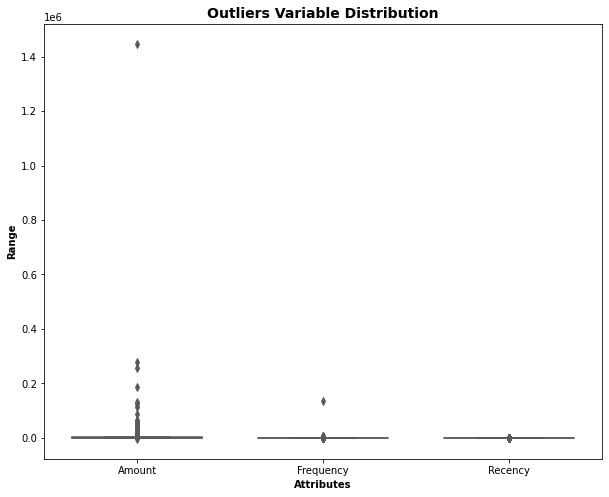

In [28]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [29]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [30]:
# Rescaling the attributes

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4294, 3)

In [31]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

Amount  Frequency   Recency
0 -0.721139  -0.753083  2.301868
1  1.719726   1.041594 -0.906269
2  0.296685  -0.463941 -0.183448
3  0.274207  -0.045183 -0.737941
4 -0.531759  -0.603527  2.143441

# MODEL BUILDING


1.K-Means Clustering:

   K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

2.The algorithm works as follows:

   First we initialize k points, called means, randomly.

   We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items    categorized in that mean so far.

   We repeat the process for a given number of iterations and at the end, we have our clusters.

In [32]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [33]:
kmeans.labels_

array([0, 1, 2, ..., 0, 2, 2])

Finding the Optimal Number of Clusters

Elbow Curve to get the right number of Clusters

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

Text(0, 0.5, 'Intertia')

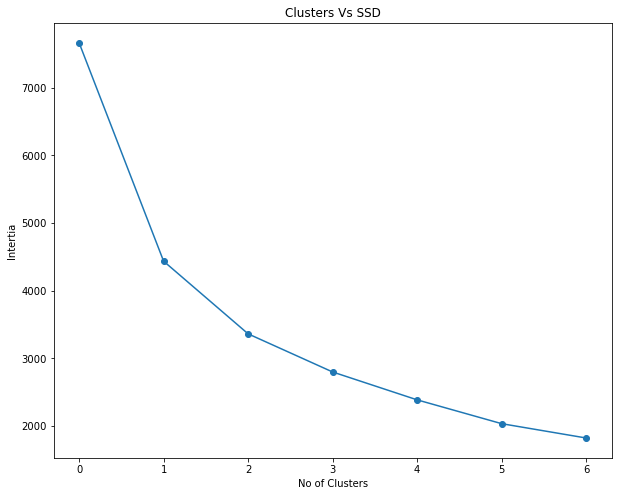

In [34]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd, marker='o')
plt.title('Clusters Vs SSD')
plt.xlabel('No of Clusters')
plt.ylabel('Intertia')

Silhouette Analysis

                    silhouette score=p−qmax(p,q)
 
p
  is the mean distance to the points in the nearest cluster that the data point is not a part of

q
  is the mean intra-cluster distance to all the points in its own cluster.

    1.The value of the silhouette score range lies between -1 to 1.

    2.A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

    3.A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [35]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5412409616707684
For n_clusters=3, the silhouette score is 0.5087593101969973
For n_clusters=4, the silhouette score is 0.4851358488445981
For n_clusters=5, the silhouette score is 0.4655763247059814
For n_clusters=6, the silhouette score is 0.41797963748253764
For n_clusters=7, the silhouette score is 0.4160068103383957
For n_clusters=8, the silhouette score is 0.3952385916599261


In [36]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [37]:
 kmeans.labels_

array([2, 1, 0, ..., 2, 0, 0])

In [38]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

CustomerID   Amount  Frequency  Recency  Cluster_Id
1     12346.0     0.00          2      325           2
2     12347.0  4310.00        182        1           1
3     12348.0  1797.24         31       74           0
4     12349.0  1757.55         73       18           0
5     12350.0   334.40         17      309           2

<AxesSubplot:xlabel='Cluster_Id', ylabel='Amount'>

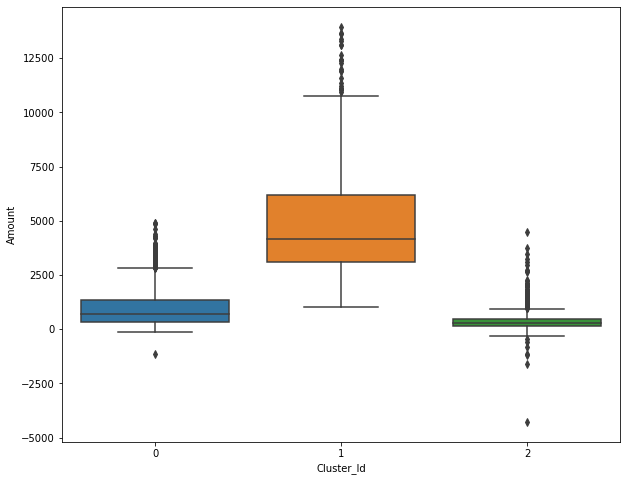

In [39]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Frequency'>

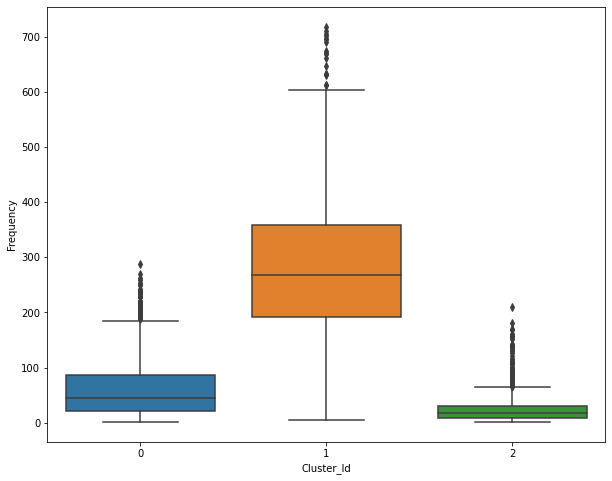

In [40]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Recency'>

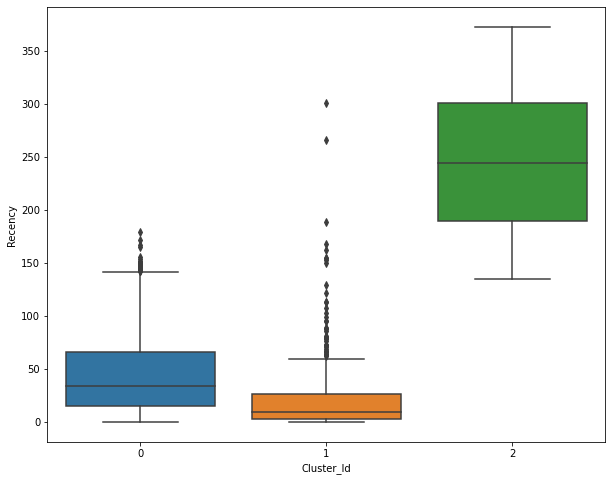

In [41]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

# FINAL ANALYSIS


Inference:
    
K-Means Clustering with 3 Cluster Ids:

Customers with Cluster Id 1 are the customers with high amount of transactions as compared to other customers.

Customers with Cluster Id 1 are frequent buyers.

Customers with Cluster Id 2 are not recent buyers and hence least of importance from business point of view.